Ссылка на датасет https://www.kaggle.com/datasets/hemajitpatel/superheros-abilities-dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Подгружаем датасет с супергероями


In [ ]:
df = pd.read_csv('superhero_abilities_dataset.csv')
df.sample(5)

,Name,Universe,Alignment,Strength,Speed,Intelligence,Combat Skill,Weapon,Power Score,Popularity Score
196,Hulk #10,DC,Anti-Hero,9.0,2.0,6.0,8,Shield,90,38
14,Flash #1,DC,Anti-Hero,3.0,5.0,3.0,3,Bow,72,59
164,Thanos #9,DC,Hero,10.0,5.0,10.0,1,NaN,48,72
113,Harley Quinn #6,DC,Hero,5.0,8.0,2.0,9,Tech,88,98
134,Flash #7,Marvel,Anti-Hero,8.0,2.0,6.0,4,Psychic,57,67


Получаем информацию о количестве строк, типе данных и информацию о частоте NaN-значений

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              200 non-null    object 
 1   Universe          200 non-null    object 
 2   Alignment         200 non-null    object 
 3   Strength          190 non-null    float64
 4   Speed             190 non-null    float64
 5   Intelligence      190 non-null    float64
 6   Combat Skill      200 non-null    int64  
 7   Weapon            171 non-null    object 
 8   Power Score       200 non-null    int64  
 9   Popularity Score  200 non-null    int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 15.8+ KB


In [ ]:
df.isna().sum()

,0
Name,0
Universe,0
Alignment,0
Strength,10
Speed,10
Intelligence,10
Combat Skill,0
Weapon,29
Power Score,0
Popularity Score,0


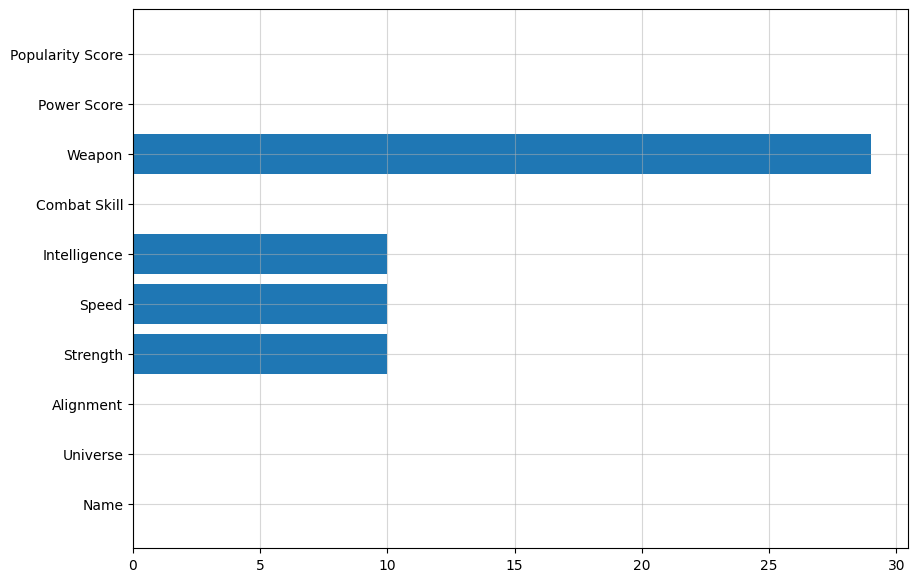

In [ ]:
df_nan = df.isna().sum()
plt.figure(figsize=(10,7))
plt.barh(df_nan.index, df_nan)
plt.grid(alpha=0.5)
plt.show()

У нас всего 200 наблюдений. При этом NaN есть и больше всего их в колонке df['Weapon']. Это категориальная переменная и, можно было бы удалить все строчки с ней сразу. Однако есть гипотеза, что NaN может говорить о героях, которые, как правило, используют разные оружия без придерживания к чему-то одному.
                                                                            
Проверим эту гипотезу
1.   Оценим, в каких наблюдениях weapon = NaN
2.   Оценим уникальные значения в колонке weapon
3.   В случае, если герои в большинстве своем без "своего уникального оружия" и и в случае отсутствия существующей категории в колонке - заменим признаком "different"

In [ ]:
df.loc[df['Weapon'].isna()].head(5)

,Name,Universe,Alignment,Strength,Speed,Intelligence,Combat Skill,Weapon,Power Score,Popularity Score
15,Doctor Strange #1,Marvel,Anti-Hero,NaN,5.0,1.0,5,NaN,55,48
27,Green Lantern #2,DC,Villain,9.0,10.0,6.0,7,NaN,52,7
28,Deadpool #2,DC,Anti-Hero,6.0,7.0,5.0,8,NaN,52,5
29,Black Panther #2,DC,Hero,7.0,10.0,NaN,3,NaN,57,45
42,Joker #3,DC,Villain,NaN,9.0,3.0,3,NaN,96,2


In [ ]:
df['Weapon'].value_counts()

,count
Weapon,
Claws,27
Magic,25
Shield,23
Sword,22
Hammer,21
Bow,21
Psychic,19
Tech,13


Как видим, герои, в целом, используют разные оружия в большинстве своем, а уникальные значения колонке df['Weapon'] сфокусировано на основноном (main) концепте героя. Таким образом, мы имеем основания для замены NaN на 'Different'

In [ ]:
df.loc[df['Weapon'].isna(), 'Weapon'] = 'Different'
print(df['Weapon'].value_counts())

Weapon
Different    29
Claws        27
Magic        25
Shield       23
Sword        22
Bow          21
Hammer       21
Psychic      19
Tech         13
Name: count, dtype: int64


Колонки Strength, Speed, Intelligence - float значения, а потому мы можем спокойно заменить NaN медианой по их столбцам


In [ ]:
nan_float = ['Strength', 'Speed', 'Intelligence']
for column in nan_float:
  df_median = df[column].median()
  df.loc[df[column].isna(), column] = df_median

In [ ]:
df.isna().sum()

,0
Name,0
Universe,0
Alignment,0
Strength,0
Speed,0
Intelligence,0
Combat Skill,0
Weapon,0
Power Score,0
Popularity Score,0


Теперь, когда с преобработкой данных завершено - перейдем непосредственно к анализу данных. Ответим на следующие вопросы

1. Есть ли разница в силе (Strength), скорости (Speed) и интеллекте (Intelligence) между героями, антигероями и злодеями?
    
2. Какая вселенная (DC или Marvel) имеет в среднем более сильных, быстрых или умных персонажей?
    
3. Какое оружие (Weapon) наиболее популярно в каждой категории (герои, антигерои, злодеи)? Есть ли определенные типы оружия, характерные для конкретной категории?
    
4. Есть ли корреляция между показателями силы (Power Score) и популярности (Popularity Score)?
    
5. Какие характеристики наиболее сильно влияют на показатель силы (Power Score)? Можно ли построить модель, предсказывающую силу на основе других характеристик?
    
6. Существуют ли "типичные профили" для героев, антигероев и злодеев (например, быстрые но слабые, или сильные но не очень умные)?
    
7. Какие персонажи являются "аномалиями" (outliers) по своим характеристикам?
    
8. Есть ли разница в популярности между героями, антигероями и злодеями из разных вселенных (DC и Marvel)?
    
9. Как распределены боевые навыки (Combat Skill) среди героев, антигероев и злодеев?
    
10. Существует ли связь между типом оружия и другими характеристиками (например, персонажи с магическим оружием имеют более высокий интеллект)?"

На некоторые вопросы будем использовать статистические методы


In [ ]:
import scipy.stats as stats

Вопрос 1. Есть ли разница в силе (Strength), скорости (Speed) и интеллекте (Intelligence) между героями, антигероями и злодеями?

In [ ]:
comprasion_hs = round(pd.pivot_table(data=df, values=['Strength', 'Speed', 'Intelligence'], index='Alignment', aggfunc='mean'), 2)
comprasion_hs

,Intelligence,Speed,Strength
Alignment,,,
Anti-Hero,5.56,5.73,5.59
Hero,5.84,5.27,5.53
Villain,5.33,4.98,5.80


In [ ]:
strength_hero = df[df['Alignment'] == 'Hero']['Strength']
strength_antihero = df[df['Alignment'] == 'Anti-Hero']['Strength']
strength_villain = df[df['Alignment'] == 'Villain']['Strength']
f_strength, p_strength = stats.f_oneway(strength_hero, strength_antihero, strength_villain)

speed_hero = df[df['Alignment'] == 'Hero']['Speed']
speed_antihero = df[df['Alignment'] == 'Anti-Hero']['Speed']
speed_villain = df[df['Alignment'] == 'Villain']['Speed']
f_speed, p_speed = stats.f_oneway(speed_hero, speed_antihero, speed_villain)

int_hero = df[df['Alignment'] == 'Hero']['Intelligence']
int_antihero = df[df['Alignment'] == 'Anti-Hero']['Intelligence']
int_villain = df[df['Alignment'] == 'Villain']['Intelligence']
f_int, p_int = stats.f_oneway(int_hero, int_antihero, int_villain)

print(f'Сила: F={f_strength:.2f}, p={p_strength:.4f}, значимость={p_strength < 0.05}')
print(f'Скорость: F={f_speed:.2f}, p={p_speed:.4f}, значимость={p_speed < 0.05}')
print(f'Интеллект: F={f_int:.2f}, p={p_int:.4f}, значимость={p_int < 0.05}')

Сила: F=0.15, p=0.8637, значимость=False
Скорость: F=1.12, p=0.3286, значимость=False
Интеллект: F=0.53, p=0.5878, значимость=False


Таким образом, у анти-героев скрость наибольшая, чем у остальных = 5.73, в тоже время по интеллекту и силе они находятся "по-середине", что является достаточно сбалансированным положением. У героев же интеллект выше остальных и равен 5.84, в тоже время сила их меньше остальных и равна 5.53. Что касается злодеев, то выигрывают они по силе = 5,80; однако по скорости и интеллекту они проигрывают как героям, так и анти-героям. Статистический тест ANOVA показал, что несмотря на эти различия - статистички они незначимы чтобы можно было говорить о серьезном дисбалансе в параметрах совокупности, что говорит об отсутствии четкой закономерности

Вопрос 2. Какая вселенная (DC или Marvel) имеет в среднем более сильных, быстрых или умных персонажей?

In [ ]:
comprasion_universe = round(pd.pivot_table(data=df, values=['Strength', 'Speed', 'Intelligence'], index='Universe', aggfunc='mean'), 2)
comprasion_universe

,Intelligence,Speed,Strength
Universe,,,
DC,5.79,5.42,5.93
Marvel,5.39,5.25,5.34


In [ ]:
characteristics = ['Strength', 'Speed', 'Intelligence']

for char in characteristics:
    dc_values = df[df['Universe'] == 'DC'][char]
    marvel_values = df[df['Universe'] == 'Marvel'][char]
    t_stat, p_val = stats.ttest_ind(dc_values, marvel_values, equal_var=False)
    print(f'По характеристике {char} между вселенными p_value = {p_val:.2f}, t_stat = {t_stat:.2f}')

По характеристике Strength между вселенными p_value = 0.16, t_stat = 1.41
По характеристике Speed между вселенными p_value = 0.67, t_stat = 0.42
По характеристике Intelligence между вселенными p_value = 0.32, t_stat = 0.99


Таким образом, по второму вопросу в совокупности видно, что по всем показателям вселенная DC выше чем вселенная Marvel. В тоже время рассматривая каждый признак по отдельности через т-критерий Стьюдента показывает отсутствие статистической закономерности по этой погрешности. Это говорит о том, что да, действительно DC имеет больше умных, быстрых и быстрых героев - но это статистически незначимо, чтобы явно говорить об этом

Вопрос 3. Какое оружие (Weapon) наиболее популярно в каждой категории (герои, антигерои, злодеи)? Есть ли определенные типы оружия, характерные для конкретной категории?

In [ ]:
pd.crosstab(index=df['Alignment'], columns=df['Weapon'])

Weapon,Bow,Claws,Different,Hammer,Magic,Psychic,Shield,Sword,Tech
Alignment,,,,,,,,,
Anti-Hero,8,7,10,5,10,5,7,7,7
Hero,7,12,8,10,11,5,9,9,2
Villain,6,8,11,6,4,9,7,6,4


Из кросс-таблицы видно, что антигерои в большинстве своем пользуются разными оружиями и магией (freq = 10), после чего идет лук (freq = 8), когти с щитом, мечом и технологией (freq=7). Частота технологий у антигероев выше, чем у остальных минимум на 3 очка. В рамках данного анализа будем считать, что этого достаточно для характерности оружия этой категории

Что касается героев, то чаще всего они пользуются когтями (что интересно) (freq = 12), далее идет магия (freq = 11), молот (freq=10), щит и меч (freq = 9). Очевидно, что когти - являются характерным оружие для героев. Кроме них, можно также скзаать о молоте.

Злодеи же в основном используют самые разные оружия (freq=11), далее идет телепатия (freq=9), когти (freq=8) и т.п. Закономерным можно считать телепатические способности.

Из общих закономерностей, можно сказать, что герои, чаще всего, используют "натуральные" оружия в роде собственных когтей или материального вида мечи с молотами и щитами. В свою очередь антигерои выбирают путь хитрости чем "удаленные атаки" технологии, магии и меча. Ну а злодеи пользуются самым разным, давая также предпочтения телепатии

Вопрос 4. Есть ли корреляция между показателями силы (Power Score) и популярности (Popularity Score)?

In [ ]:
power_population = df[['Power Score', 'Popularity Score']].copy()
power_population.corr()

,Power Score,Popularity Score
Power Score,1.000000,-0.094583
Popularity Score,-0.094583,1.000000


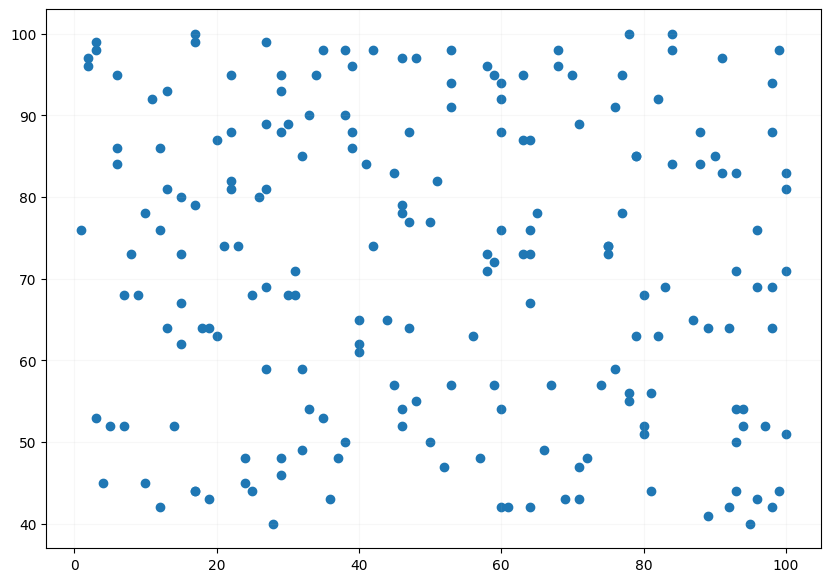

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(power_population['Popularity Score'], power_population['Power Score'], label='Зависимость силы от популярности')
plt.grid(alpha=0.09)
plt.show()

Таким образом, заметим, что корреляции практически нет - значит мы не можем говорить о какой-либо зависимости популярности и силы героя

Вопрос 5. Какие характеристики наиболее сильно влияют на показатель силы (Power Score)? Можно ли построить модель, предсказывающую силу на основе других характеристик?

<Axes: >

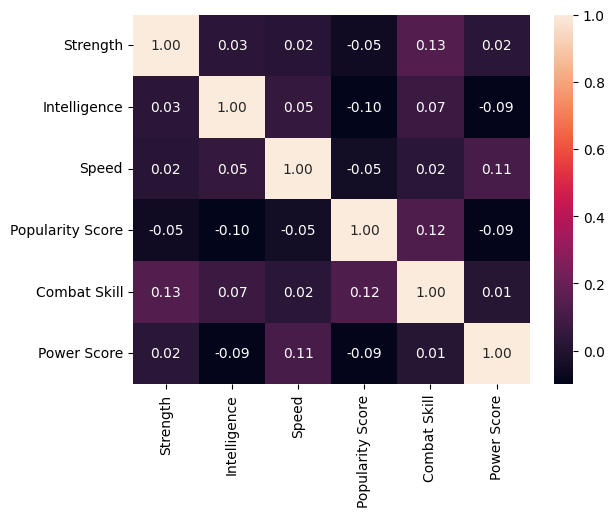

In [ ]:
import seaborn as sns
chars = ['Strength', 'Intelligence', 'Speed', 'Popularity Score', 'Combat Skill', 'Power Score']
df_chars = df[chars].copy()
corr_matrix = df_chars.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f")

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Выбираем независимые переменные (предикторы)
X = df[['Strength', 'Speed', 'Intelligence', 'Combat Skill']]
# Целевая переменная
y = df['Power Score']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

y_predict = model.predict(x_test)

r2 = r2_score(y_test, y_predict)
print(r2)
rmse = np.sqrt(mean_squared_error(y_test, y_predict))
print(rmse)

-0.07506144616710264
19.91333457363252


Вопрос 6. Существуют ли "типичные профили" для героев, антигероев и злодеев (например, быстрые но слабые, или сильные но не очень умные)?

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

features = ['Strength', 'Speed', 'Intelligence', 'Combat Skill', 'Power Score']
X_cluster = df[features].copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

pd.crosstab(df['Cluster'], df['Alignment'])

Alignment,Anti-Hero,Hero,Villain
Cluster,,,
0,20,23,18
1,24,28,26
2,22,22,17


<ipython-input-24-2398422519>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df, palette='Set2')


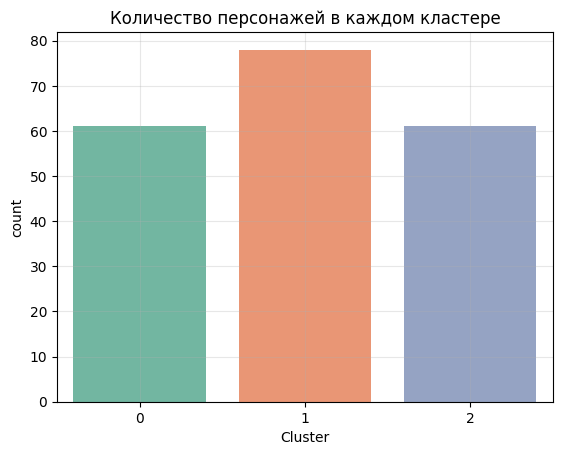

In [ ]:
sns.countplot(x='Cluster', data=df, palette='Set2')
plt.title('Количество персонажей в каждом кластере')
plt.grid(alpha=0.3)
plt.show()

In [ ]:
df.groupby('Cluster')[features].mean().round(2)

,Strength,Speed,Intelligence,Combat Skill,Power Score
Cluster,,,,,
0,4.95,7.49,4.11,4.70,84.57
1,7.35,4.96,6.67,7.71,69.58
2,4.13,3.66,5.69,3.10,60.62


Таким образом, по кластерам мы видим смешанные типы героев - т.е.нельзя сказать что есть кластеры чисто "добрые" или "чисто" злые.

Однако по типичным профилям в самих кластерах видна интересная зкономерность. В кластере "0" самые быстрые - но при этом несколько слабые по интеллекту и силе персонажи - можно сказать "ловкие". В тоже время в кластере "1" у нас в основном самые сильные в том числе по combat skills, более того, в этом кластере и самые интеллектуальные по показателю. В свою очередь кластер "2" не может ничем похвастаться. Его представители самые слабые по показателям.

Вопрос 7. Какие персонажи являются "аномалиями" (outliers) по своим характеристикам?

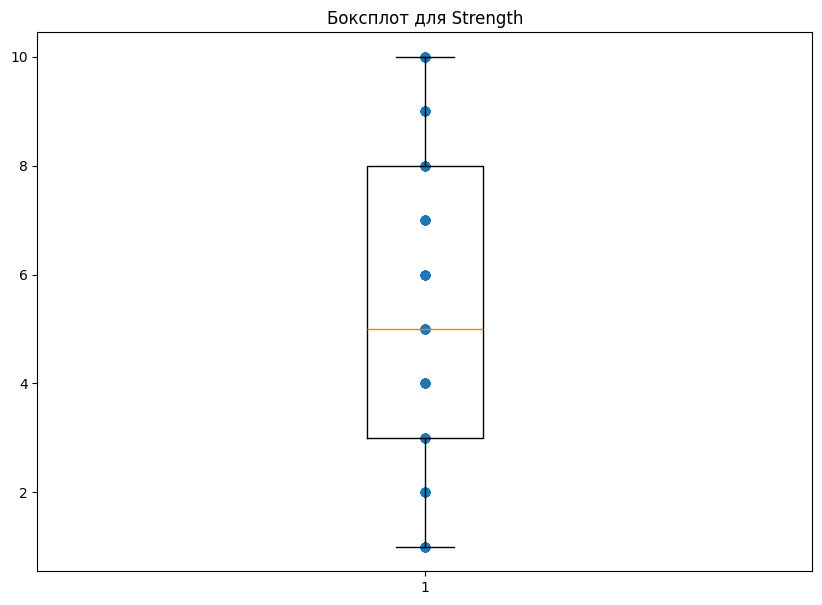

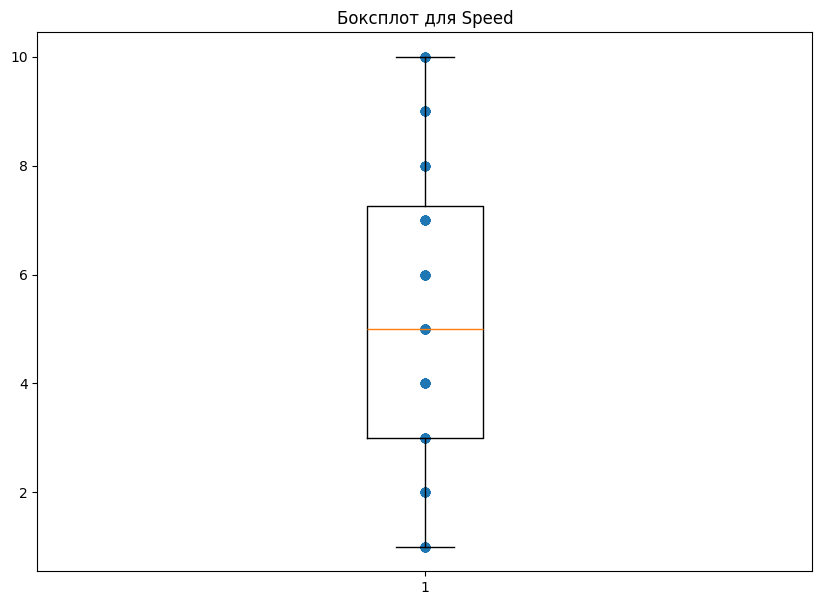

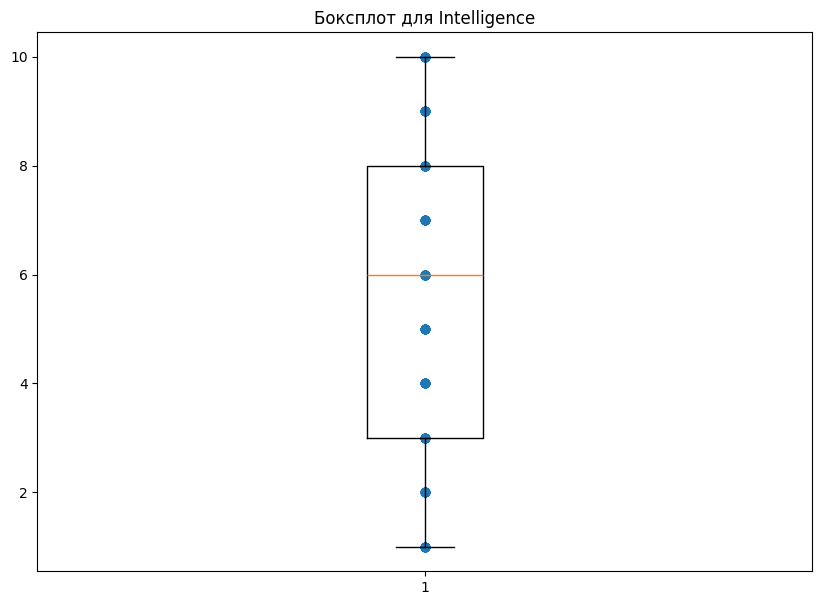

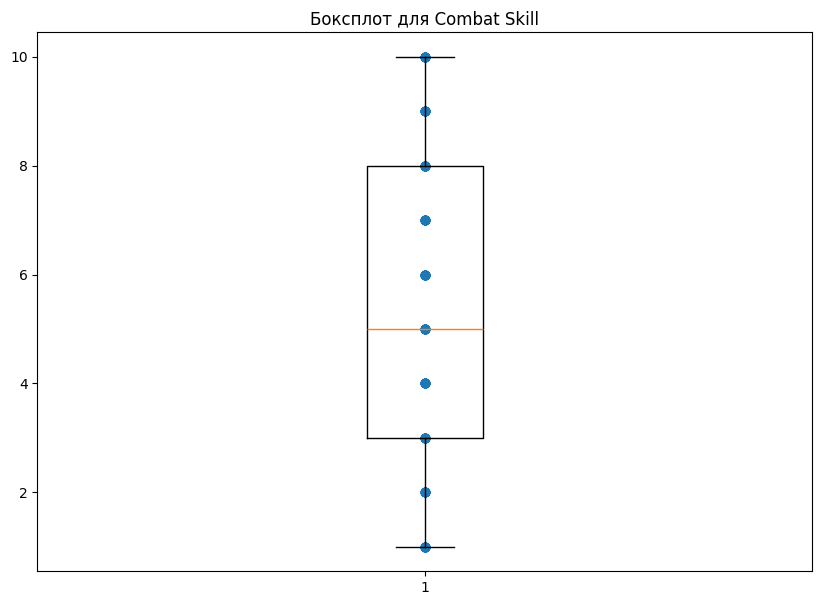

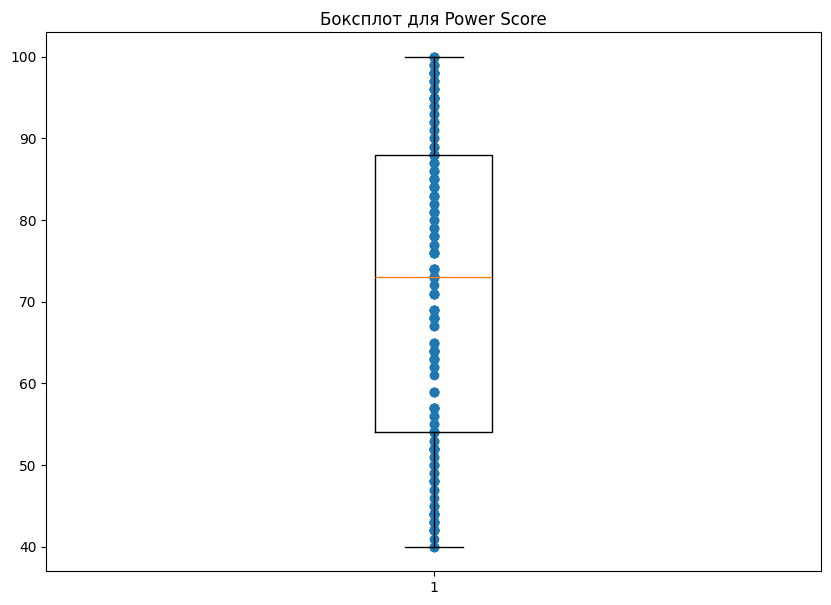

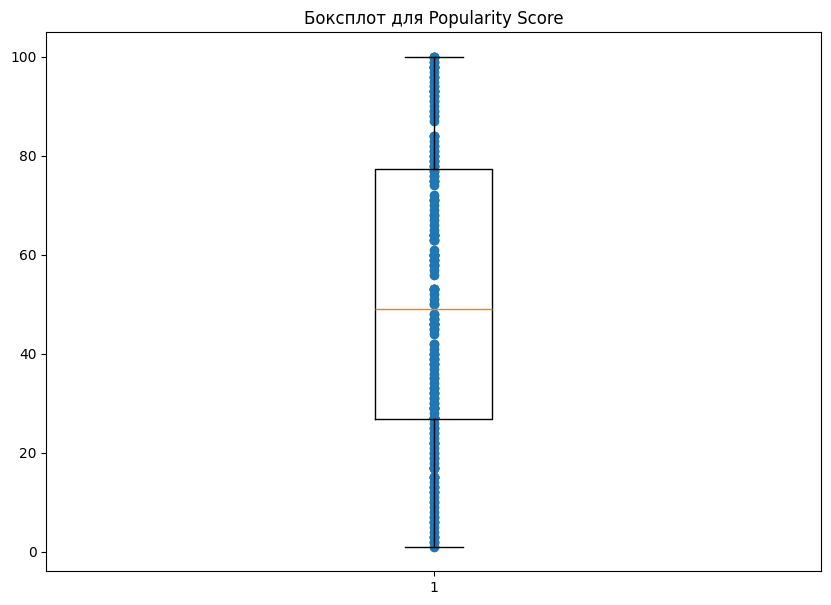

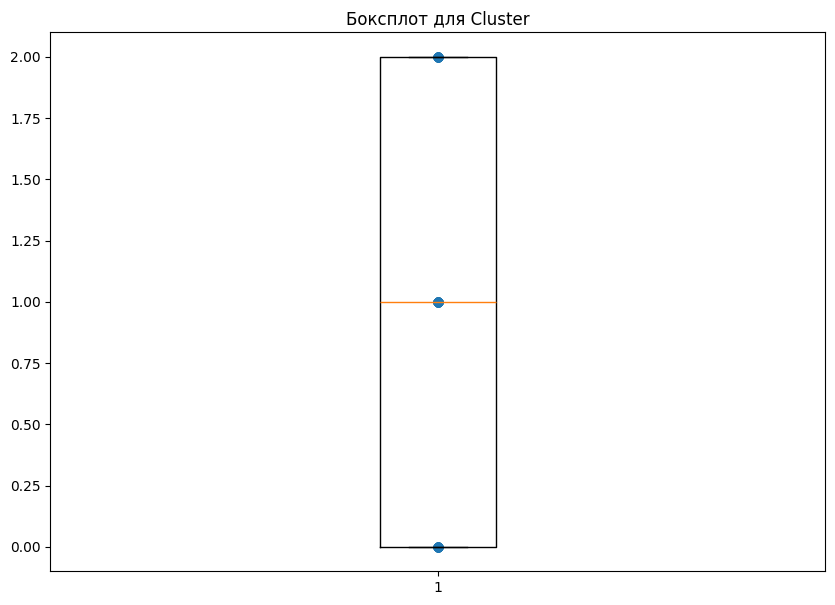

In [ ]:
for column in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(10,7))
    plt.boxplot(df[column])
    plt.scatter(np.ones(len(df[column])), df[column])
    plt.title(f'Боксплот для {column}')
    plt.show()


Аномальных значений не обнаружено не по одной переменной - значит и героев, которые сильно бы критично отличались бы от среднего по совокупности - нет

Вопрос 8. Есть ли разница в популярности между героями, антигероями и злодеями из разных вселенных (DC и Marvel)?

In [ ]:
pd.pivot_table(data=df, values='Popularity Score', index=['Universe', 'Alignment'])

Popularity Score
Universe Alignment                  
DC       Anti-Hero         50.096774
         Hero              50.218750
         Villain           50.108108
Marvel   Anti-Hero         47.057143
         Hero              50.878049
         Villain           60.416667

Интересно, что популярность у героев DC примерно одинаковая, неважно - "герой" это или "злодей" с "антигероем" что говорит о максимальном балансе. В тоже время в Marvel несколько хуже относятся к анти-героям. А вот к злодеям напротив получше - на целых 10%

Вопрос 9. Как распределены боевые навыки (Combat Skill) среди героев, антигероев и злодеев?

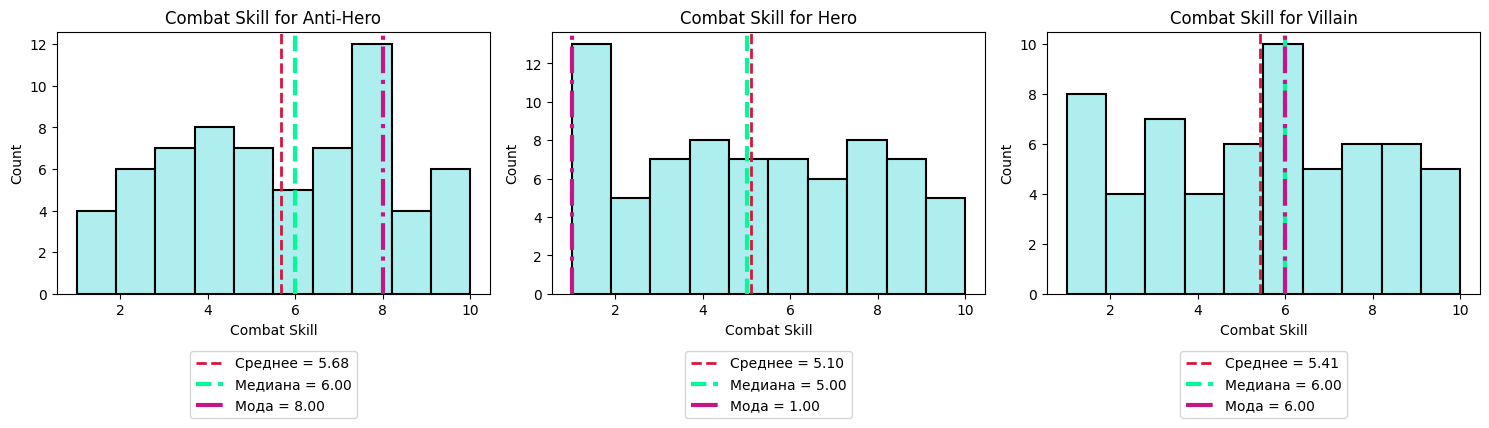

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
alignments = df['Alignment'].unique()

for i, alignment in enumerate(alignments):
    if i < 3:
        subset = df[df['Alignment'] == alignment]['Combat Skill']
        sbmean = subset.mean()
        sbmed = subset.median()
        sbmode = subset.mode().values

        axes[i].hist(subset, color='#AFEEEE', edgecolor='black', linewidth=1.5, bins=10)
        axes[i].axvline(sbmean, color='#DC143C', linewidth=2, linestyle='--', label=f'Среднее = {sbmean:.2f}')
        axes[i].axvline(sbmed, color='#00FA9A', linewidth=3, linestyle='--', label=f'Медиана = {sbmed:.2f}')
        for ii in range(len(sbmode)):
          axes[i].axvline(sbmode[ii], color='#C71585', linewidth=3, linestyle='-.', label=f'Мода = {sbmode[ii]:.2f}')
        axes[i].set_title(f'Combat Skill for {alignment}')
        axes[i].set_xlabel('Combat Skill')
        axes[i].set_ylabel('Count')
        axes[i].legend(loc='lower center', bbox_to_anchor=(0.5, -0.5))


plt.tight_layout()
plt.show()

Получатся, что антигероии в среднем более умелые по боевым искусствам. Достаточная часть имеют мастерство в нем (мода = 8). Не далеко от этого ушли и злодеи, чьи боевые искусства в среднем такие же, как у антигероев, но чуть слабее. А вот у героев с боевыми искусствами все слабее. Есть большая часть тех, для кого показатель близок к 0.

Вопрос 10. Существует ли связь между типом оружия и другими характеристиками (например, персонажи с магическим оружием имеют более высокий интеллект)?"


In [ ]:
weapchar = df.groupby('Weapon')[['Strength', 'Speed', 'Intelligence','Combat Skill', 'Power Score', 'Popularity Score']].mean()
weapchar

,Strength,Speed,Intelligence,Combat Skill,Power Score,Popularity Score
Weapon,,,,,,
Bow,5.190476,5.619048,6.476190,4.428571,76.952381,52.761905
Claws,5.444444,5.592593,5.037037,4.518519,65.814815,49.740741
Different,6.172414,4.793103,5.551724,5.241379,68.551724,48.000000
Hammer,5.142857,5.238095,5.142857,5.619048,73.095238,54.285714
Magic,6.200000,5.760000,5.400000,5.240000,73.640000,41.240000
Psychic,5.789474,5.421053,6.473684,7.000000,65.947368,55.578947
Shield,5.217391,5.347826,5.304348,5.391304,74.565217,56.652174
Sword,6.181818,5.272727,5.545455,5.318182,69.636364,53.954545
Tech,4.846154,4.846154,5.769231,6.692308,79.000000,49.000000


1. Персонажи с психическим оружием имеют самый высокий показатель боевых навыков (Combat Skill = 7.0) и второй по величине интеллект (Intelligence = 6.47)
2. Персонажи с луком обладают самым высоким интеллектом (Intelligence = 6.48).
3. Персонажи с магическим оружием имеют высокую силу (Strength = 6.2), но относительно низкую популярность (Popularity Score = 41.24).
4. Персонажи с технологическим оружием имеют самый высокий Power Score (79.0), но низкую силу и скорость.
5.  Персонажи со щитом имеют самый высокий показатель популярности (Popularity Score = 56.65).

В ходе проведенного исследования анализ не выявил статистически значимых различий между героями, антигероями и злодеями по ключевым параметрам, хотя наблюдаются некоторые тенденции: антигерои превосходят по скорости, герои — по интеллекту, а злодеи — по силе.

Персонажи вселенной DC в среднем демонстрируют более высокие показатели, чем герои Marvel, однако эти различия также статистически незначимы. Выявлены характерные предпочтения в оружии: герои тяготеют к "натуральным" видам (когти, молот), антигерои — к технологиям и магии, злодеи — к телепатии. Корреляция между силой и популярностью персонажей практически отсутствует.

Кластерный анализ выделил три типа героев: "ловкие" (быстрые, но уступающие по другим параметрам), "сильные и умные" (с высокими показателями по всем характеристикам) и "слабые" (с низкими показателями), при этом распределение героев, антигероев и злодеев по кластерам оказалось относительно равномерным.

Значимых статистических выбросов в характеристиках персонажей не обнаружено, что свидетельствует об отсутствии критически аномальных героев в выборке.

Данный анализ показывает, что стереотипные представления о характеристиках героев и злодеев не всегда соответствуют действительности, и различия между группами персонажей часто статистически незначимы.